In [1]:
import json
import pandas as pd

In [3]:
edges = pd.read_csv('/mnt/data/git_web_ml/musae_git_edges.csv')
features = json.loads(open('/mnt/data/git_web_ml/musae_git_features.json').read())
targets = pd.read_csv('/mnt/data/git_web_ml/musae_git_target.csv')

In [2]:
edges = pd.read_csv('/mnt/data/lastfm_asia/lastfm_asia_edges.csv')
features = json.loads(open('/mnt/data/lastfm_asia/lastfm_asia_features.json').read())
targets = pd.read_csv('/mnt/data/lastfm_asia/lastfm_asia_target.csv')

In [ ]:
edges = pd.read_csv('/mnt/data/facebook_large/musae_facebook_edges.csv')
features = json.loads(open('/mnt/data/facebook_large/musae_facebook_features.json').read())
targets = pd.read_csv('/mnt/data/facebook_large/musae_facebook_target.csv')

In [3]:
print(edges.head())
print(len(edges))
print(len(features))

   node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478
27806
7624


In [4]:
features['0']

[2964,
 3900,
 3902,
 2402,
 6185,
 509,
 7627,
 3389,
 2407,
 5,
 4403,
 3633,
 5875,
 3395,
 3531,
 6908,
 3202,
 5883,
 21,
 7389,
 1449,
 5391,
 3400,
 2911,
 6618,
 3315,
 1454,
 4904,
 3409,
 3920,
 6401,
 3923,
 4909,
 2919,
 532,
 1463,
 540,
 4427,
 5907,
 7412,
 1926,
 7416,
 3935,
 5913,
 4349,
 6420,
 1472,
 6948,
 3979,
 58,
 5918,
 5920,
 5417,
 6950,
 4439,
 1020,
 4442,
 5925,
 1945,
 3947,
 3442,
 5941,
 1027,
 4805,
 5528,
 3455,
 2457,
 4159,
 7235,
 5720,
 1359,
 7444,
 2463,
 1044,
 4461,
 3042,
 3471,
 1504,
 6977,
 7450,
 1507,
 4464,
 6388,
 584,
 6454,
 585,
 3479,
 6455,
 6986,
 4893,
 3154,
 3482,
 3483,
 2477,
 6041,
 6731,
 1138,
 2977,
 6468,
 3993,
 2006,
 7366,
 7005,
 602,
 3998,
 2991,
 5460,
 7009,
 7010,
 3500,
 2499,
 6736,
 6367,
 5464,
 7014,
 4990,
 7016,
 2999,
 1530,
 4500,
 1075,
 338,
 5468,
 1533,
 1078,
 2541,
 7024,
 6635,
 3523,
 4019,
 2024,
 4081,
 498,
 5011,
 3069,
 3530,
 4025,
 1549,
 133,
 7037,
 3533,
 1552,
 5489,
 2533,
 2581,
 

In [5]:
max = 0
min = 100000
sum = 0
for key in features.keys():
    if len(features[key]) > max:
        max = len(features[key])
    if len(features[key]) < min:
        min = len(features[key])
    sum += len(features[key])
print(max)
print(min)
print(sum/len(features.keys()))

944
0
395.3778856243442


(array([284.,  61.,  67.,  61.,  53.,  71.,  73.,  57.,  79.,  76.,  71.,
         96.,  68.,  89.,  72.,  83.,  99.,  95., 103.,  90.,  90.,  83.,
         91., 101.,  91.,  88.,  83.,  95.,  80., 103.,  83.,  98.,  76.,
        100.,  94.,  78., 111., 109.,  87.,  95., 110.,  82.,  98.,  91.,
        102.,  87., 101.,  98., 107.,  74., 106.,  98.,  98.,  97.,  90.,
         88., 106., 103., 109., 110., 108., 108.,  90., 106., 119., 102.,
         93.,  78.,  93.,  75., 105.,  83.,  86.,  81.,  86.,  76.,  71.,
         71.,  58.,  65.,  46.,  60.,  29.,  41.,  26.,  22.,  27.,  13.,
         19.,  12.,   9.,  10.,   6.,   4.,   2.,   4.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   9.44,  18.88,  28.32,  37.76,  47.2 ,  56.64,  66.08,
         75.52,  84.96,  94.4 , 103.84, 113.28, 122.72, 132.16, 141.6 ,
        151.04, 160.48, 169.92, 179.36, 188.8 , 198.24, 207.68, 217.12,
        226.56, 236.  , 245.44, 254.88, 264.32, 273.76, 283.2 , 292.64,
        302.08, 311.52, 320.96

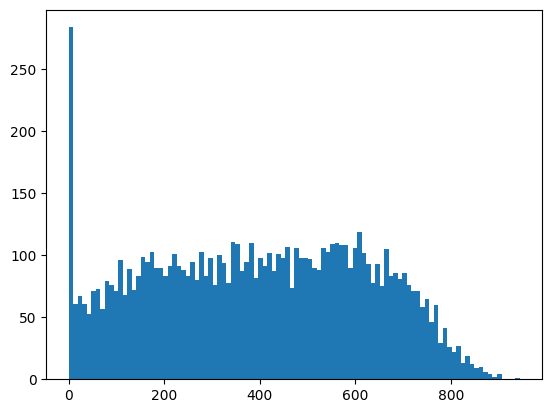

In [6]:
# histogram of number of features
import matplotlib.pyplot as plt
import numpy as np
plt.hist([len(features[key]) for key in features.keys()], bins=100)

In [7]:
# padd missing features with -1 and make all features the same length
max_len = 0
for key in features.keys():
    if len(features[key]) > max_len:
        max_len = len(features[key])
for key in features.keys():
    features[key] = features[key] + [-1]*(max_len-len(features[key]))
# convert features to pandas dataframe
features = pd.DataFrame(features).T
print(features.head())


    0     1     2     3     4     5     6     7     8     9    ...  934  935  \
0  2964  3900  3902  2402  6185   509  7627  3389  2407     5  ...   -1   -1   
1  7375  1890  2400  1122   980  1441  6283  2907  7387   983  ...   -1   -1   
2   753   873  1545  4857   979  2634  6895  6896  4025  6395  ...   -1   -1   
3   504  3380  4626  1836  2402  4788  5871  2322  3389  1604  ...   -1   -1   
4  6897  6898  3394  1441  7385    13  2909  6388   523  6106  ...   -1   -1   

   936  937  938  939  940  941  942  943  
0   -1   -1   -1   -1   -1   -1   -1   -1  
1   -1   -1   -1   -1   -1   -1   -1   -1  
2   -1   -1   -1   -1   -1   -1   -1   -1  
3   -1   -1   -1   -1   -1   -1   -1   -1  
4   -1   -1   -1   -1   -1   -1   -1   -1  

[5 rows x 944 columns]


In [8]:
print(targets.head())
print(len(targets))
print(targets.describe())

   id  target
0   0       8
1   1      17
2   2       3
3   3      17
4   4       5
7624
                id       target
count  7624.000000  7624.000000
mean   3811.500000     9.339979
std    2201.003559     5.917230
min       0.000000     0.000000
25%    1905.750000     5.000000
50%    3811.500000    10.000000
75%    5717.250000    15.000000
max    7623.000000    17.000000


In [9]:
targets['id'] = targets['id'].astype(int)

In [10]:
# add an id column to features
features['id'] = features.index
features['id'] = features['id'].astype(int)
targets = targets.sort_values(by='id')
# merge by id
data = pd.merge(features, targets, on='id')
print(data.head())

      0     1     2     3     4     5     6     7     8     9  ...  936  937  \
0  2964  3900  3902  2402  6185   509  7627  3389  2407     5  ...   -1   -1   
1  7375  1890  2400  1122   980  1441  6283  2907  7387   983  ...   -1   -1   
2   753   873  1545  4857   979  2634  6895  6896  4025  6395  ...   -1   -1   
3   504  3380  4626  1836  2402  4788  5871  2322  3389  1604  ...   -1   -1   
4  6897  6898  3394  1441  7385    13  2909  6388   523  6106  ...   -1   -1   

   938  939  940  941  942  943  id  target  
0   -1   -1   -1   -1   -1   -1   0       8  
1   -1   -1   -1   -1   -1   -1   1      17  
2   -1   -1   -1   -1   -1   -1   2       3  
3   -1   -1   -1   -1   -1   -1   3      17  
4   -1   -1   -1   -1   -1   -1   4       5  

[5 rows x 946 columns]


In [11]:
data.to_csv('/mnt/data/lastfm_asia/lastfm_asia_nodes.csv', index=False)

In [12]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [13]:
from src.datasets import LastFMAsia

dataset = LastFMAsia(
    root='/mnt/data/lastfm_asia/',
    split_type='random', 
)

2024-08-17 20:44:21 - INFO - Creating edges...
2024-08-17 20:44:21 - INFO - Creating graph...
2024-08-17 20:44:21 - INFO - Graph created in 0.14719605445861816 seconds.
2024-08-17 20:44:22 - INFO - Edges created.
2024-08-17 20:44:22 - INFO - Creating nodes...


No split column found. Using the same graph for train, val and test.
                 0            1            2            3            4  \
count  7624.000000  7624.000000  7624.000000  7624.000000  7624.000000   
mean   4270.893101  3952.739376  3864.688484  3682.460913  3569.478489   
std    2369.347907  2248.933320  2250.826081  2264.462099  2286.956113   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%    2397.000000  2397.000000  2168.000000  1773.000000  1535.250000   
50%    4546.000000  3900.000000  3900.000000  3633.000000  3389.000000   
75%    6369.000000  5868.000000  5868.000000  5868.000000  5868.000000   
max    7814.000000  7800.000000  7805.000000  7836.000000  7836.000000   

                 5            6            7            8            9  ...  \
count  7624.000000  7624.000000  7624.000000  7624.000000  7624.000000  ...   
mean   3527.613720  3494.537251  3492.966684  3584.788169  3661.041579  ...   
std    2302.109556  2348.77

2024-08-17 20:44:54 - INFO - Nodes created.
